In [52]:
from scipy.interpolate import interp1d
import numpy as np

import shlex
import subprocess as sp


import matplotlib.pyplot as plt

import prettyplotlib as ppl
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import io
from pandas import read_csv
import os
import re


%matplotlib inline


In [8]:
PATH_PROJECT = '/home/matheus/Documentos/Mestrado/teste/poc-test-user-github'
CMD = 'git log --no-merges --no-renames --numstat --pretty=format:"%x09%x09%x09%aN"'

In [3]:

os.chdir(PATH_PROJECT)
p = sp.Popen(shlex.split(CMD), stdout=sp.PIPE)

stdout, _ = p.communicate()

table = read_csv(io.StringIO(stdout.decode('utf-8')), sep="\x09", header=None,names=['additions', 'deletions', 'path','author'])

commit_data = table[['additions', 'deletions', 'path']].join(table[['author']].fillna(method='ffill')).dropna()


# commit_data.head()
commit_data


,additions,deletions,path,author
1,14.0,0.0,frontend/index.html,Matheus Flauzino
2,0.0,0.0,frontend/style.css,Matheus Flauzino
4,2.0,0.0,backend/services.js,Leticia Amaral
5,1.0,0.0,backend/test/http.test.js,Leticia Amaral
7,4789.0,180.0,backend/package-lock.json,Matheus Flauzino
8,3.0,0.0,backend/package.json,Matheus Flauzino
9,1.0,0.0,backend/test/userTest.js,Matheus Flauzino
10,1.0,0.0,backend/tests/user.test.js,Matheus Flauzino
12,26.0,0.0,backend/package-lock.json,Leticia Amaral
13,1.0,0.0,backend/package.json,Leticia Amaral


# Verifica quem está contribuindo para teste

In [9]:
commit_data.filter(items=['path', 'author'])

# commit_data['origin'] = commit_data['path']
commit_data['test'] = commit_data.path.apply(lambda x: 1 if '/test/' in x or '/tests/' in x else 0)
commit_data['file'] = commit_data.path.apply(lambda x: x.split('.')[-1])

commit_data

,additions,deletions,path,author,test,file
1,14.0,0.0,frontend/index.html,Matheus Flauzino,0,html
2,0.0,0.0,frontend/style.css,Matheus Flauzino,0,css
4,2.0,0.0,backend/services.js,Leticia Amaral,0,js
5,1.0,0.0,backend/test/http.test.js,Leticia Amaral,1,js
7,4789.0,180.0,backend/package-lock.json,Matheus Flauzino,0,json
8,3.0,0.0,backend/package.json,Matheus Flauzino,0,json
9,1.0,0.0,backend/test/userTest.js,Matheus Flauzino,1,js
10,1.0,0.0,backend/tests/user.test.js,Matheus Flauzino,1,js
12,26.0,0.0,backend/package-lock.json,Leticia Amaral,0,json
13,1.0,0.0,backend/package.json,Leticia Amaral,0,json


# Distribuição de contribuições teste e não-teste

### Total de Contribuições por autor

In [20]:
total_contributions_author = commit_data['author'].value_counts()
total_contributions_author

Matheus Flauzino    12
Leticia Amaral       5
Name: author, dtype: int64

In [41]:
per_contributions_author = total_contributions_author/total_contributions_author.sum()*100
per_contributions_author

Matheus Flauzino    70.588235
Leticia Amaral      29.411765
Name: author, dtype: float64

In [49]:
total_contributions_author

Matheus Flauzino    12
Leticia Amaral       5
Name: author, dtype: int64

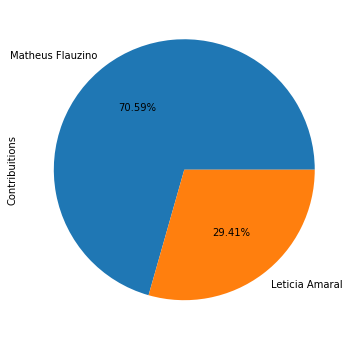

In [60]:
total_contributions_author.plot(kind='pie', autopct="%0.2f%%",figsize=(6,6),label="Contribuitions")

### Total de Contribuições teste por autor

#### Teste e não teste do projeto todo

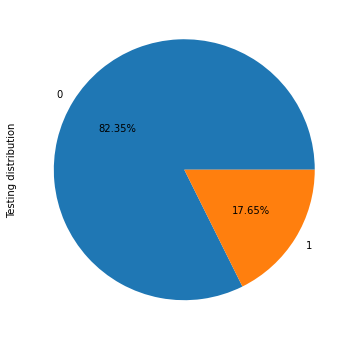

In [84]:
dist_project_test = commit_data['test'].value_counts()
dist_project_test.plot(kind='pie', autopct="%0.2f%%",figsize=(6,6),label="Testing distribution")

In [30]:
total_contributions_author_test = commit_data[commit_data['test'] == 1]['author'].value_counts()
total_contributions_author_test

Matheus Flauzino    2
Leticia Amaral      1
Name: author, dtype: int64

#### Divisão de testes por autor

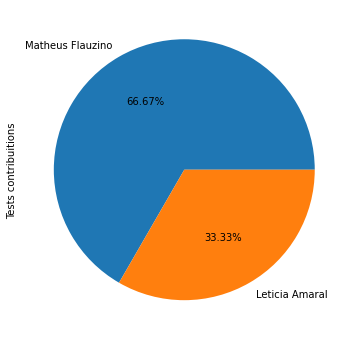

In [69]:
total_contributions_author_test.plot(kind='pie', autopct="%0.2f%%",figsize=(6,6),label="Tests contribuitions")

In [10]:
total=commit_data.path.str.contains(r'js$',regex=True).sum()
totaltotal=commit_data.path.str.contains(r'js$',regex=True).sum()
total

7